In [1]:
!wget --no-check-certificate \
  http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.names \
  http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv

--2021-09-17 16:15:42--  http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3420 (3.3K) [application/x-httpd-php]
Saving to: ‘forestfires.names’

forestfires.names   100%[===================>]   3.34K  --.-KB/s    in 0s      

2021-09-17 16:15:43 (224 MB/s) - ‘forestfires.names’ saved [3420/3420]

--2021-09-17 16:15:43--  http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv
Reusing existing connection to archive.ics.uci.edu:80.
HTTP request sent, awaiting response... 200 OK
Length: 25478 (25K) [application/x-httpd-php]
Saving to: ‘forestfires.csv’

forestfires.csv     100%[===================>]  24.88K  --.-KB/s    in 0.1s    

2021-09-17 16:15:43 (191 KB/s) - ‘forestfires.csv’ saved [25478/25478]

FINISHED

# Import Libraries

In [4]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Data Laoding

In [6]:
#via colab
df= pd.read_csv('/content/forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
#via lokal
df = pd.read_csv('D:/git/Deep-Learning-Forest-Fire-Team-Alpha-Batch8/dataset/forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


# Exploratory Data Analysis

In [8]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


missing value percentage:

X        0.0
Y        0.0
month    0.0
day      0.0
FFMC     0.0
DMC      0.0
DC       0.0
ISI      0.0
temp     0.0
RH       0.0
wind     0.0
rain     0.0
area     0.0
dtype: float64


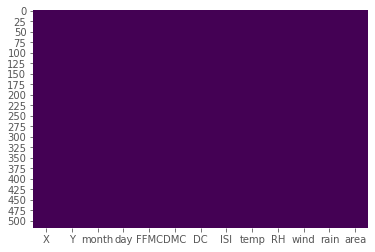

In [9]:
def check_missing(data):
  print("missing value percentage:\n")
  print(round(np.mean(data.isnull())*100,2))
  sns.heatmap(data.isnull(), cbar=False, cmap=sns.color_palette("viridis", as_cmap=True))

check_missing(df)

In [10]:
burned= df[df["area"]>0]
burned.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
138,9,9,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36
139,1,4,sep,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43
140,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47
141,1,2,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55
142,8,6,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61


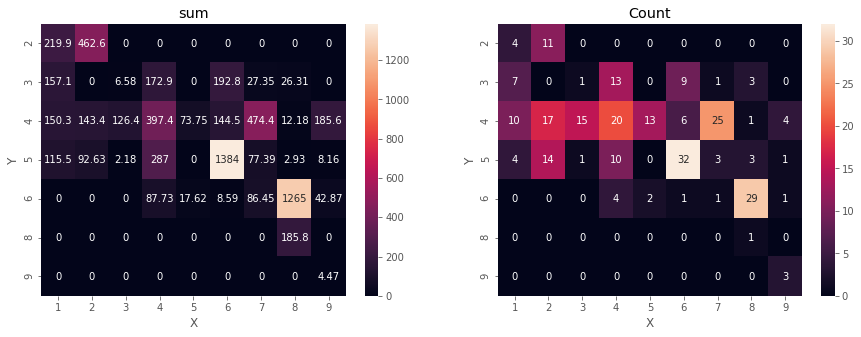

In [11]:
#@markdown Dari heatmap dibawah ini dapat diambil kesimpulan bahwa titik yang paling banyak
#@markdown areanya terbakar adalah titik koordinat (6,5) dan (8.6) juga
#@markdown titik yang paling sering
#@markdown mengalami kebakaran adalah titik koordinat (6,5),(7,4) dan (8.6)

f, axs = plt.subplots(1, 2, figsize=(15, 5))

coorarea_sum= df.pivot_table(index=["Y"], columns=["X"],values="area",aggfunc=sum)
coorarea_sum= coorarea_sum.fillna(value=0)
axs[0].set_title('sum')
sns.heatmap(coorarea_sum, annot=True, ax=axs[0], fmt='.4g')

coorarea_count= burned.pivot_table(index=["Y"], columns=["X"],values="area",aggfunc=len)
coorarea_count= coorarea_count.fillna(value=0)
axs[1].set_title('Count')
sns.heatmap(coorarea_count, annot=True, ax=axs[1])

Text(0.5, 1.0, 'burned report count')

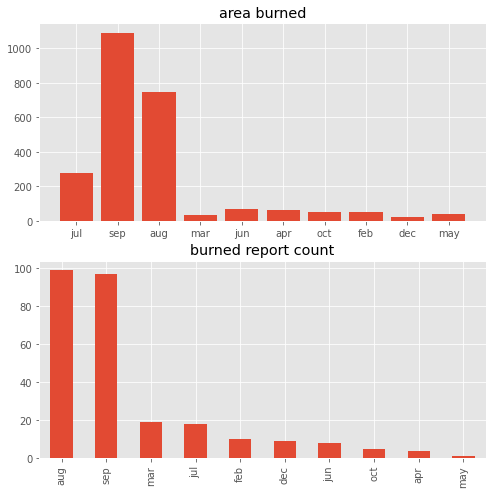

In [12]:
fig, axs= plt.subplots(2, figsize=(8,8))
axs[0].bar(burned["month"], burned["area"])
axs[0].set_title("area burned")

burned["month"].value_counts().plot(kind="bar", ax= axs[1])
axs[1].set_title("burned report count")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c8f56e7d0>,
      dtype=object)

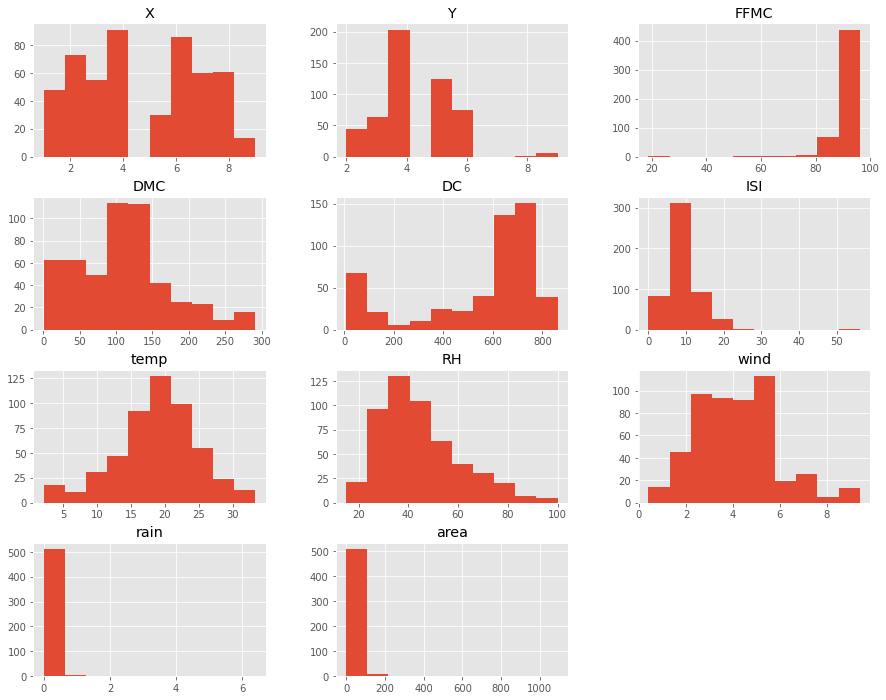

In [13]:
df.hist(figsize=(15,12))

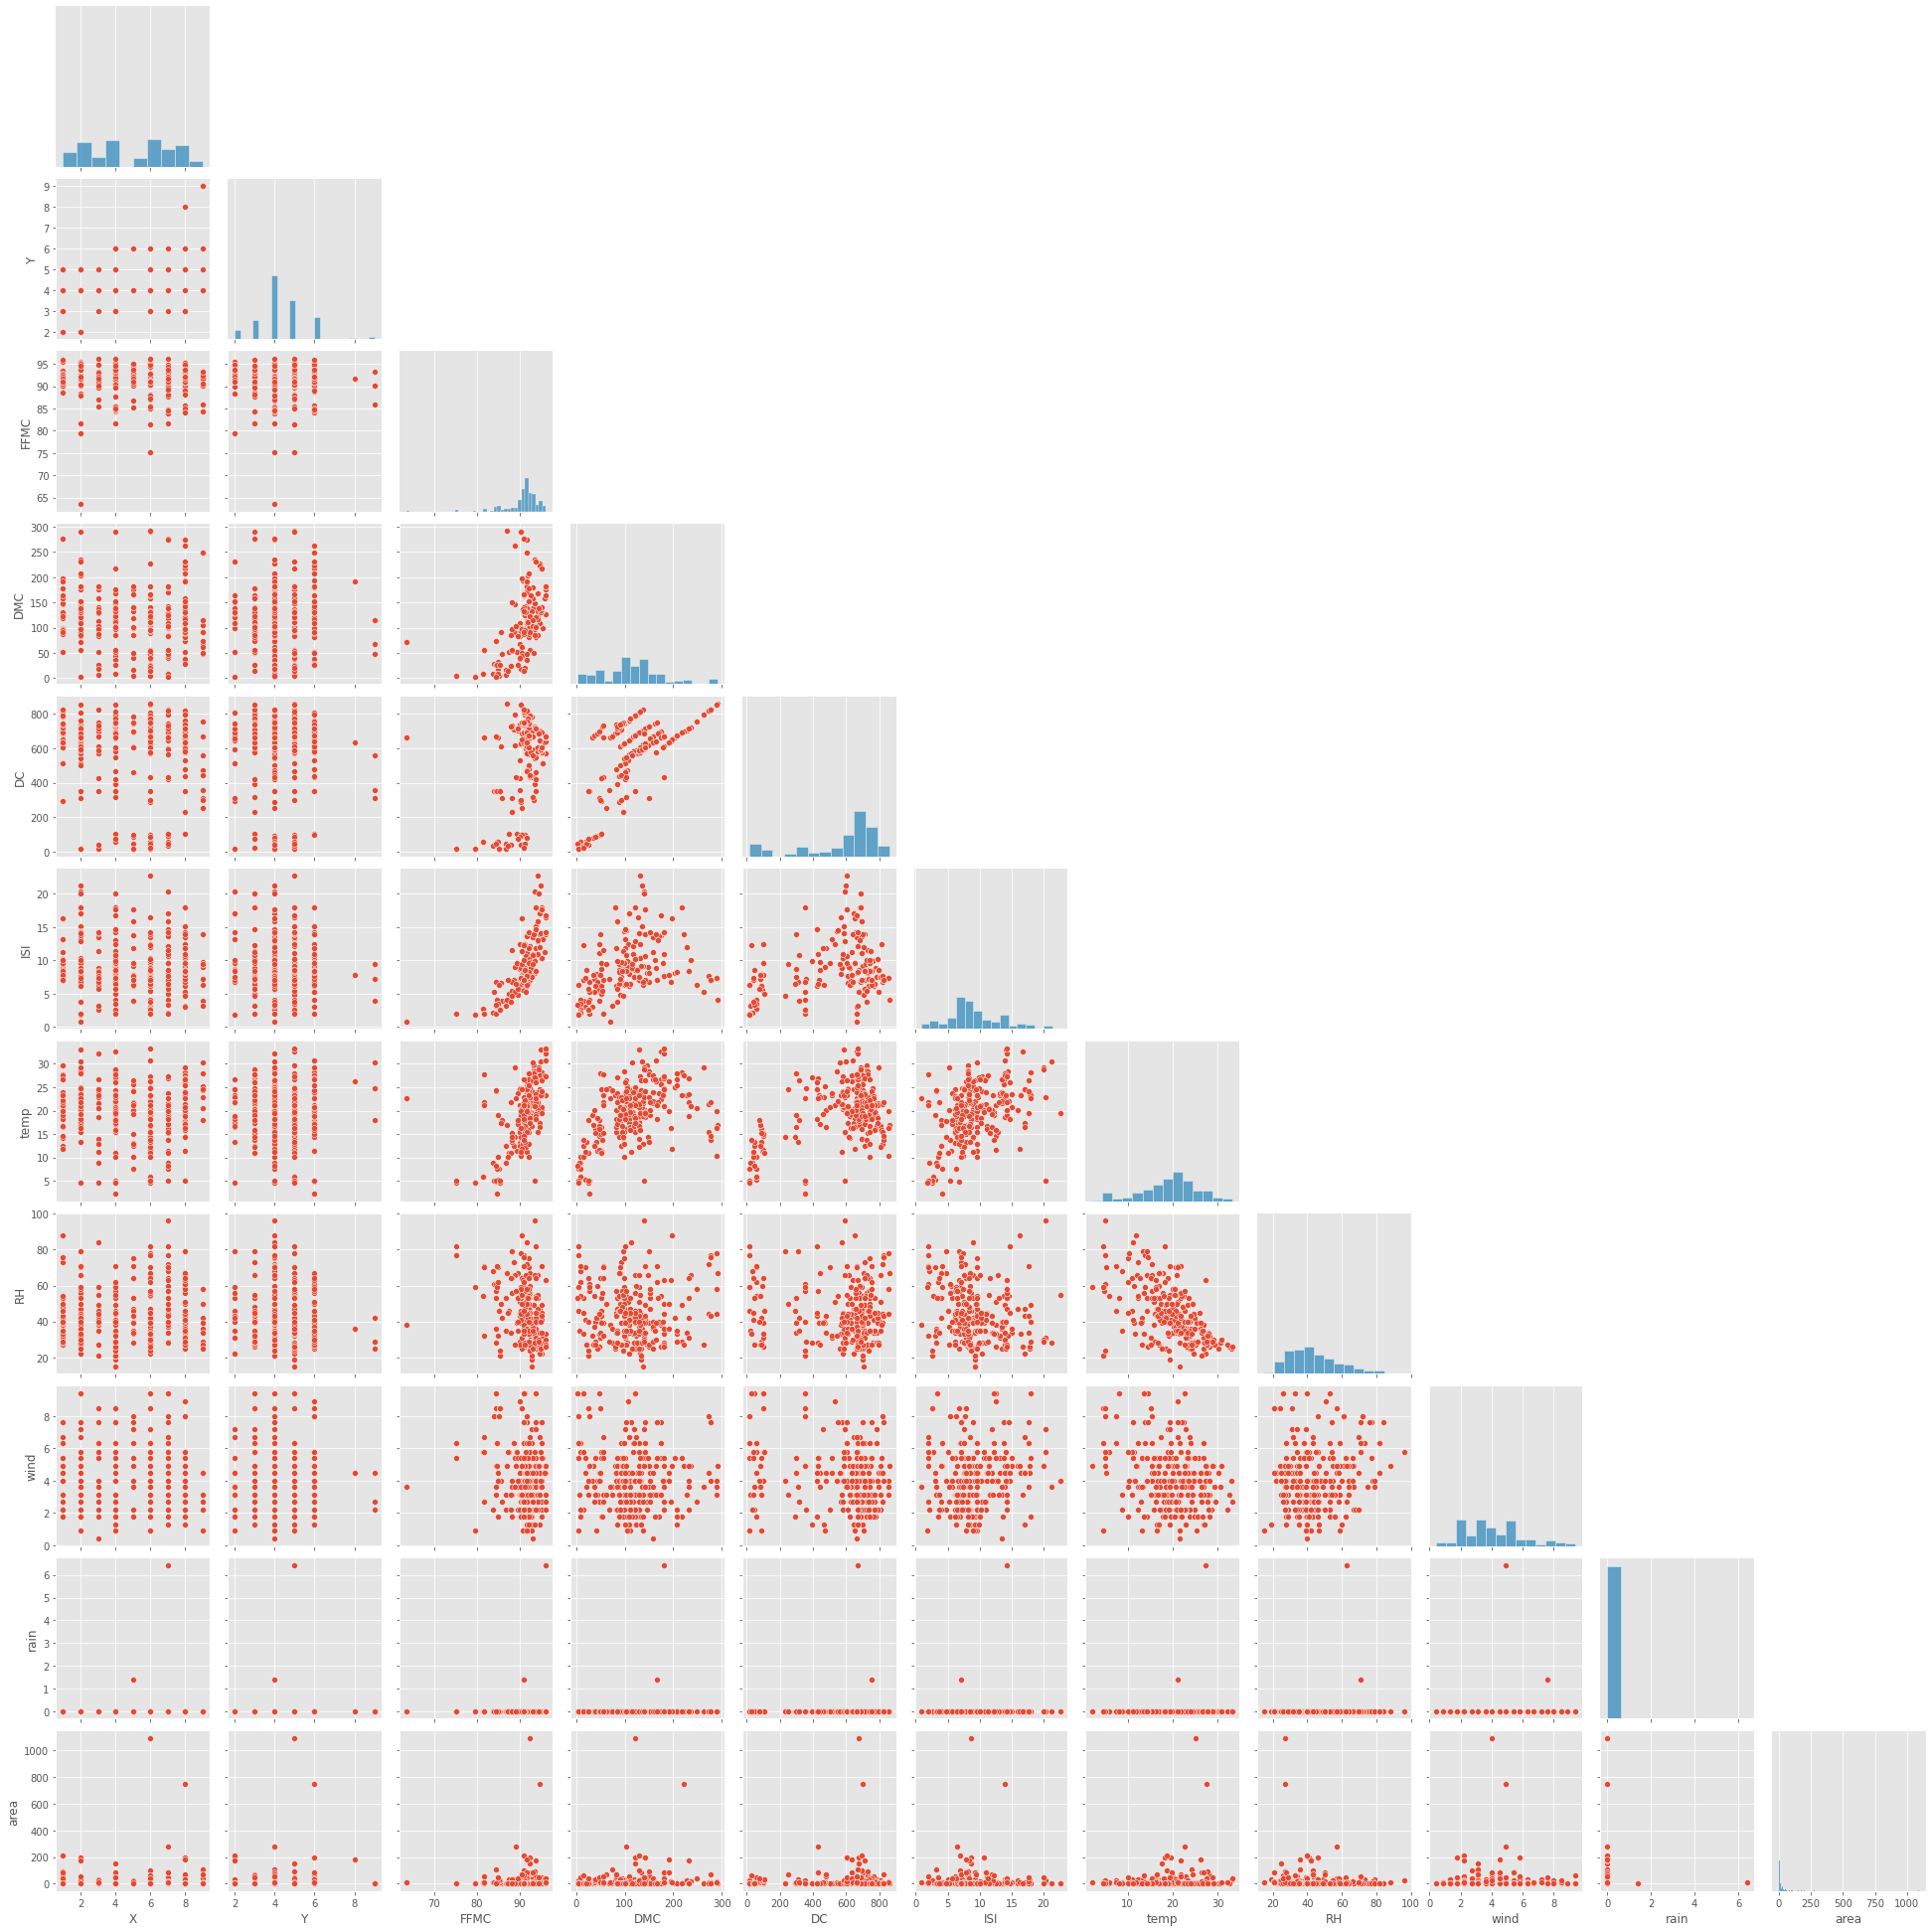

In [14]:
sns.pairplot(burned, corner=True)

In [15]:
def area_cat(area):
    if area == 0.0:
      return("Tidak terbakar")
    else:
      return("Terbakar")
      
df= df.drop(columns=['day'])
df['damage_category'] = df['area'].apply(area_cat)
area= df.pop('area')
df.head()

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,damage_category
0,7,5,mar,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,Tidak terbakar
1,7,4,oct,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,Tidak terbakar
2,7,4,oct,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,Tidak terbakar
3,8,6,mar,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,Tidak terbakar
4,8,6,mar,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,Tidak terbakar


In [16]:
categorical_col= df.columns[:3]
encoded = pd.get_dummies(df, columns = categorical_col)
temp= encoded.pop('damage_category')
encoded.insert(encoded.shape[1], 'damage_category', temp)
encoded.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,Y_2,Y_3,Y_4,Y_5,Y_6,Y_8,Y_9,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,damage_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Tidak terbakar
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Tidak terbakar
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Tidak terbakar
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Tidak terbakar
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Tidak terbakar


In [17]:
encoded= encoded.sample(frac= 1)
encoded.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,Y_2,Y_3,Y_4,Y_5,Y_6,Y_8,Y_9,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,damage_category
484,94.9,130.3,587.1,14.1,33.1,25,4.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Terbakar
209,93.7,80.9,685.2,17.9,23.2,26,4.9,0.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Terbakar
319,92.8,119.0,783.5,7.5,21.6,28,6.3,0.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Terbakar
429,91.6,181.3,613.0,7.6,24.6,44,4.0,0.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Terbakar
117,91.7,35.8,80.8,7.8,15.2,27,4.9,0.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Tidak terbakar


In [18]:
from sklearn.model_selection import train_test_split

x= encoded[encoded.columns[:-1]]
y= encoded[encoded.columns[-1:]]

In [19]:
from sklearn.preprocessing import normalize

xscaled= pd.DataFrame(normalize(x), columns=x.columns)
xscaled

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,Y_2,Y_3,Y_4,Y_5,Y_6,Y_8,Y_9,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.155467,0.213461,0.961802,0.023099,0.054225,0.040956,0.006553,0.0,0.0,0.001638,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.001638,0.0,0.0,0.0,0.0,0.001638,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
1,0.134354,0.116000,0.982488,0.025666,0.033266,0.037281,0.007026,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.001434,0.000000,0.0,0.001434,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.001434
2,0.116182,0.148984,0.980913,0.009390,0.027042,0.035055,0.007887,0.0,0.0,0.000000,0.000000,0.000000,0.001252,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.001252,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.001252
3,0.141401,0.279870,0.946277,0.011732,0.037975,0.067922,0.006175,0.0,0.0,0.000000,0.001544,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.001544,0.000000,0.0,0.0,0.0,0.0,0.001544,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
4,0.697847,0.272442,0.614897,0.059359,0.115674,0.205473,0.037290,0.0,0.0,0.000000,0.007610,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.007610,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.007610,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.721273,0.242266,0.586331,0.059185,0.143623,0.228850,0.024463,0.0,0.0,0.000000,0.000000,0.007891,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.007891,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.007891,0.0,0.0,0.0,0.000000
513,0.121011,0.084085,0.987068,0.002818,0.041227,0.047455,0.004004,0.0,0.0,0.000000,0.000000,0.001483,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.001483,0.000000,0.000000,0.0,0.0,0.0,0.0,0.001483,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
514,0.717794,0.209391,0.550771,0.030960,0.114880,0.350342,0.021998,0.0,0.0,0.000000,0.000000,0.008147,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.008147,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.008147,0.0,0.0,0.0,0.000000
515,0.123869,0.109005,0.983590,0.007078,0.031569,0.065120,0.005663,0.0,0.0,0.001416,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.001416,0.0,0.0,0.0,0.0,0.001416,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [20]:
xtrain, xtest, ytrain, ytest= train_test_split(xscaled, y, test_size= 0.2)

In [21]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

rfc= DecisionTreeClassifier(criterion="gini", max_depth=10)
rfc.fit(xtrain, ytrain)

ypred= rfc.predict(xtrain, check_input=True)
print("train acc:", accuracy_score(ytrain, ypred))

ypred= rfc.predict(xtest, check_input=True)
print("validation acc: ", accuracy_score(ytest, ypred))

train acc: 0.8111380145278451
validation acc:  0.6057692307692307


In [23]:
ytrain= pd.get_dummies(ytrain)
ytest= pd.get_dummies(ytest)

import tensorflow as tf

model= tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(optimizer='rmsprop', loss= 'categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(xtrain, ytrain, batch_size=8, epochs=200, validation_data=(xtest, ytest))

Epoch 1/200
52/52 [==============================] - 1s 6ms/step - loss: 0.6914 - accuracy: 0.5254 - val_loss: 0.6972 - val_accuracy: 0.4712
Epoch 2/200
52/52 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5448 - val_loss: 0.6904 - val_accuracy: 0.5481
Epoch 3/200
52/52 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5521 - val_loss: 0.6945 - val_accuracy: 0.5481
Epoch 4/200
52/52 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5642 - val_loss: 0.6936 - val_accuracy: 0.5481
Epoch 5/200
52/52 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5617 - val_loss: 0.6931 - val_accuracy: 0.5481
Epoch 6/200
52/52 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5666 - val_loss: 0.6967 - val_accuracy: 0.5481
Epoch 7/200
52/52 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5593 - val_loss: 0.6934 - val_accuracy: 0.5481
Epoch 8/200
5